In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
# ignore warning messages to improve code readability and suppress unnecessary output
warnings.filterwarnings('ignore')

In [8]:
# read dataset and add to dataframe bank_data
patient_data = pd.read_csv("Heart_Disease_Prediction.csv", sep=",")

In [9]:
# first 5 rows of data
print(patient_data.head())
print("---------------------------------------------------------------------------------------------------")
# last 5 rows of data
print(patient_data.tail())
print("---------------------------------------------------------------------------------------------------")
# number of rows and columns
print(patient_data.shape)

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   80    0                3  115          564             0            2   
2   55    1                2  124          261             0            0   
3   65    1                4  128          263             0            0   
4   45    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [10]:
# names of the columns
print(patient_data.columns)

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


In [11]:
# data type and non-null count of each column
print(patient_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [12]:
# count of uniques in each column
print(patient_data.nunique())

Age                         42
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64


In [13]:
# descriptive statistics of numeric columns
print(patient_data.describe())

              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.077778    0.677778         3.174074  131.344444   249.659259   
std      9.201052    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     47.000000    0.000000         3.000000  120.000000   213.000000   
50%     54.000000    1.000000         3.000000  130.000000   245.000000   
75%     60.750000    1.000000         4.000000  140.000000   280.000000   
max     80.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min 

In [14]:
# descriptive statistics of categorical columns
print(patient_data.describe(include = ["object"]))

       Heart Disease
count            270
unique             2
top          Absence
freq             150


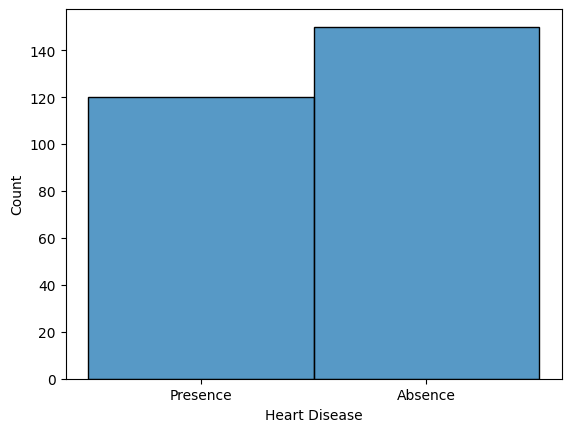

In [15]:
# histogram of patient info
sns.histplot(patient_data, x="Heart Disease" , bins = 100)
plt.show()

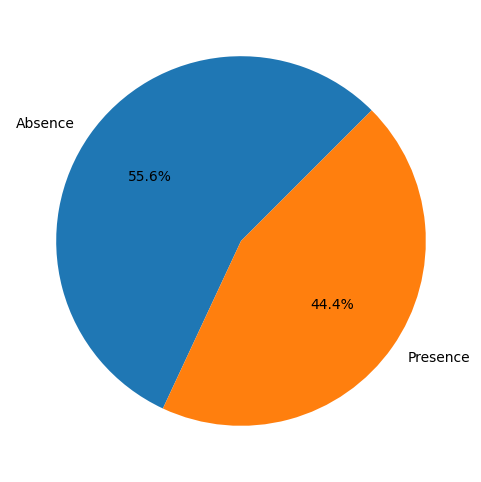

In [16]:
# heart disease pie chart
hd_status = patient_data["Heart Disease"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(hd_status, labels=hd_status.index, autopct='%1.1f%%', startangle=45)
plt.show()

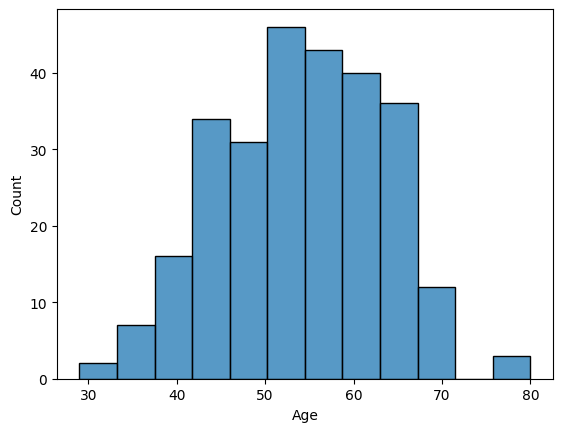

In [17]:
# histogram of all ages
sns.histplot(patient_data["Age"])
plt.show()

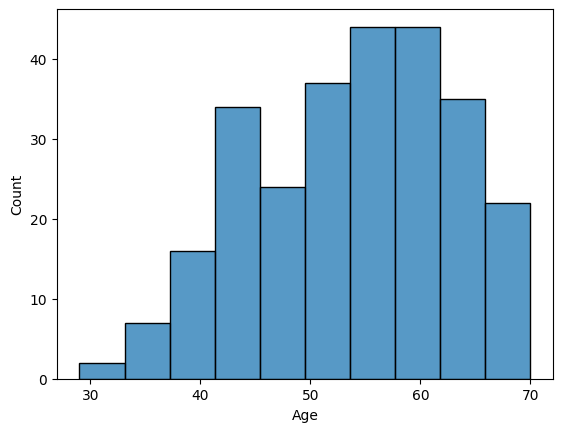

In [18]:
# histogram ignoring all outliers
new_age = patient_data["Age"][patient_data["Age"]<= 70]
sns.histplot(new_age)
plt.show()

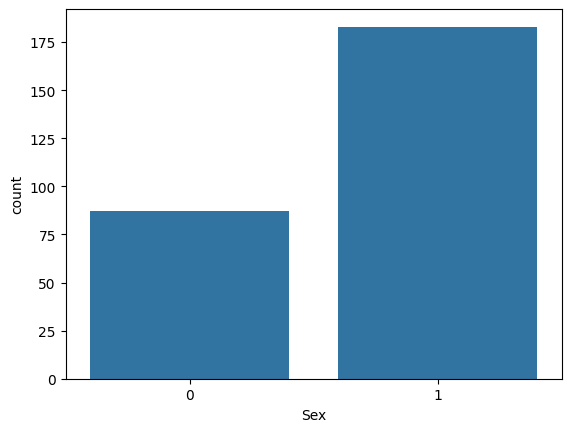

In [19]:
# sex column
sns.countplot(patient_data, x="Sex")
plt.show()

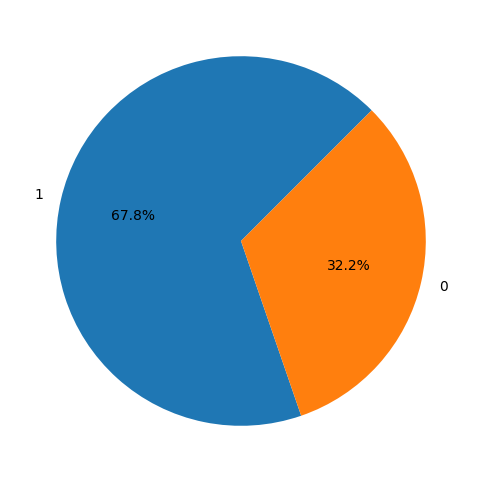

In [20]:
# sex pie chart
hd_status = patient_data["Sex"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(hd_status, labels=hd_status.index, autopct='%1.1f%%', startangle=45)
plt.show()

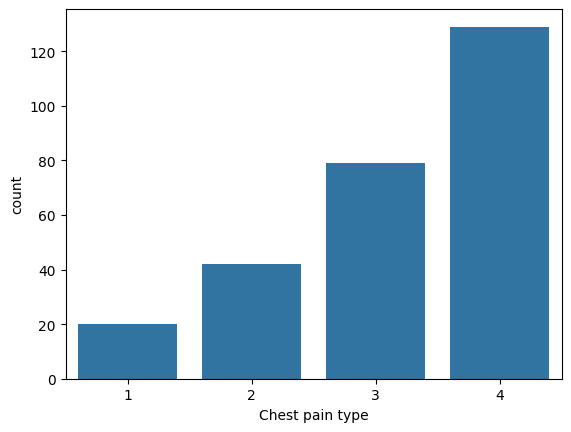

In [21]:
# chest pain column
sns.countplot(patient_data, x="Chest pain type")
plt.show()

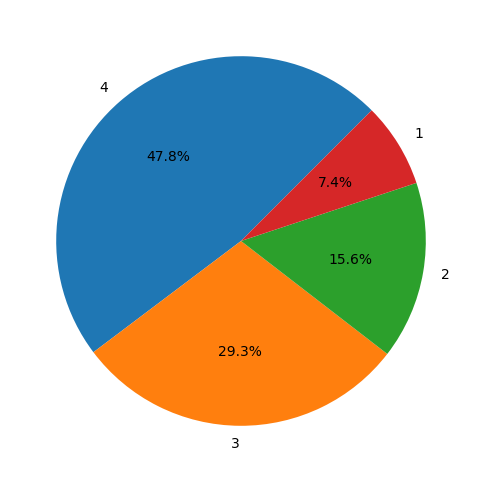

In [22]:
# chest pain type pie chart
hd_status = patient_data["Chest pain type"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(hd_status, labels=hd_status.index, autopct='%1.1f%%', startangle=45)
plt.show()

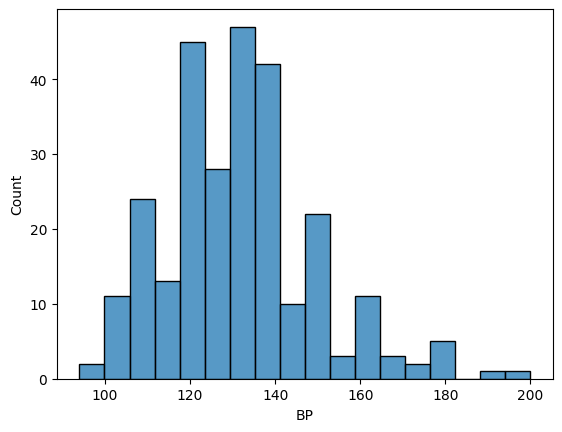

In [23]:
# histogram of BP column
sns.histplot(patient_data["BP"])
plt.show()

In [24]:
# bivirate
data_copy = patient_data.copy()
numeric_data = data_copy.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                              Age       Sex  Chest pain type        BP  \
Age                      1.000000 -0.084770         0.092851  0.296292   
Sex                     -0.084770  1.000000         0.034636 -0.062693   
Chest pain type          0.092851  0.034636         1.000000 -0.043196   
BP                       0.296292 -0.062693        -0.043196  1.000000   
Cholesterol              0.285092 -0.201647         0.090465  0.173019   
FBS over 120             0.125882  0.042140        -0.098537  0.155681   
EKG results              0.144758  0.039253         0.074325  0.116157   
Max HR                  -0.348452 -0.076101        -0.317682 -0.039136   
Exercise angina          0.091004  0.180022         0.353160  0.082793   
ST depression            0.205487  0.097412         0.167244  0.222800   
Slope of ST              0.175391  0.050545         0.136900  0.142472   
Number of vessels fluro  0.359950  0.086830         0.225890  0.085697   
Thallium                 0.117915  0.3

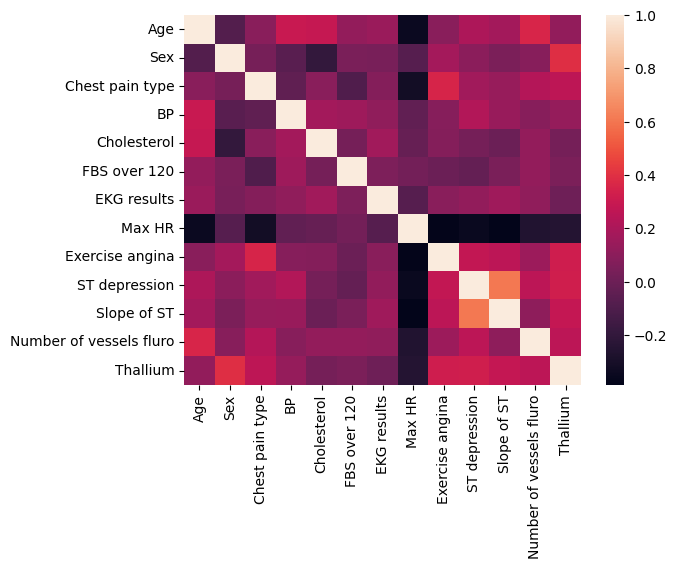

In [25]:
sns.heatmap(correlation_matrix)
plt.show()

In [26]:
# converting heart disease to 1/0
patient_data['Heart Disease'] = patient_data['Heart Disease'].replace({"Presence": 1 , "Absence": 0})

In [27]:
# checking new table
print(patient_data.head())
print(patient_data.tail())
print(patient_data.columns)

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   80    0                3  115          564             0            2   
2   55    1                2  124          261             0            0   
3   65    1                4  128          263             0            0   
4   45    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0

In [28]:
# scaling using minmax scaler
columns = patient_data.columns
scaler = MinMaxScaler()
patient_data = scaler.fit_transform(patient_data)
patient_data = pd.DataFrame(patient_data , columns=[columns])

In [29]:
# data augmentation using SMOTE
y = patient_data["Heart Disease"]
X = patient_data.drop("Heart Disease" , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

sm = SMOTE()
X_train , y_train = sm.fit_resample(X_train, y_train)
print(y_train.value_counts())

print(y_test.value_counts())

print(X_train.shape)

(Heart Disease,)
0.0                 117
1.0                 117
Name: count, dtype: int64
(Heart Disease,)
0.0                 33
1.0                 21
Name: count, dtype: int64
(234, 13)


In [30]:
# modeling + evaluation
# utility function for plotting confusion matrix
def plot_confusion_matrix(y_test , y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    sns.heatmap(cm_norm, annot=cm, cmap='Blues', fmt='d', cbar=False)  
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

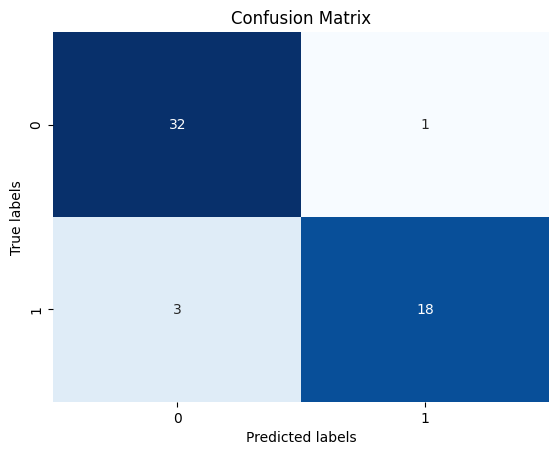

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        33
         1.0       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



In [31]:
# logistic regression
lr_model = LogisticRegression(max_iter=200 , random_state = 42)
lr_model.fit(X_train,y_train)
y_predlr = lr_model.predict(X_test)

plot_confusion_matrix(y_test , y_predlr)
print(classification_report(y_test, y_predlr))

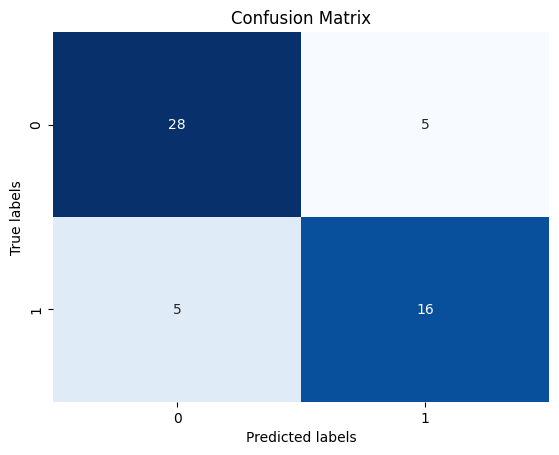

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        33
         1.0       0.76      0.76      0.76        21

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54



In [32]:
# support vector machine
svc_model = SVC(random_state = 42)
svc_model.fit(X_train, y_train)
y_predsvc = svc_model.predict(X_test)

plot_confusion_matrix(y_test , y_predsvc)
print(classification_report(y_test, y_predsvc))

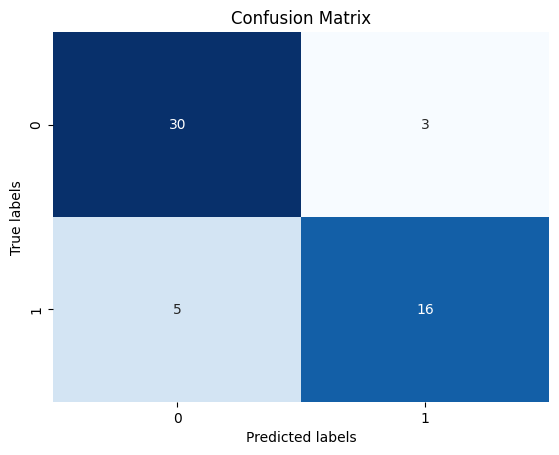

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88        33
         1.0       0.84      0.76      0.80        21

    accuracy                           0.85        54
   macro avg       0.85      0.84      0.84        54
weighted avg       0.85      0.85      0.85        54



In [33]:
# k nearest neighbor
knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(X_train, y_train)
y_predknn = knn_model.predict(X_test)

plot_confusion_matrix(y_test , y_predknn)
print(classification_report(y_test, y_predknn))

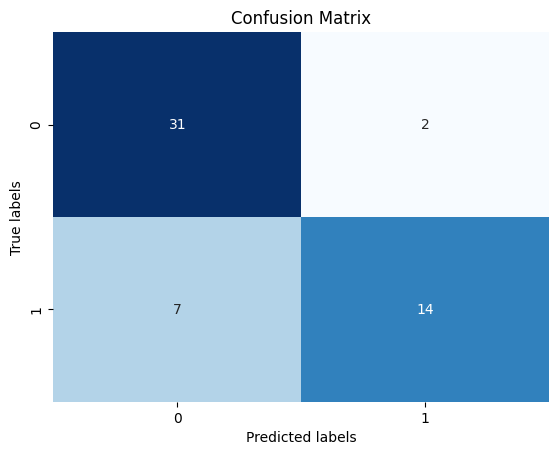

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.87        33
         1.0       0.88      0.67      0.76        21

    accuracy                           0.83        54
   macro avg       0.85      0.80      0.81        54
weighted avg       0.84      0.83      0.83        54



In [34]:
# xgboost
xgb_model = xgb.XGBClassifier(eta = 0.25 , n_estimator = 100 , max_depth = 6, random_stare = 42)
xgb_model.fit(X_train, y_train)
y_predxgb = xgb_model.predict(X_test)

plot_confusion_matrix(y_test , y_predxgb)
print(classification_report(y_test, y_predxgb))

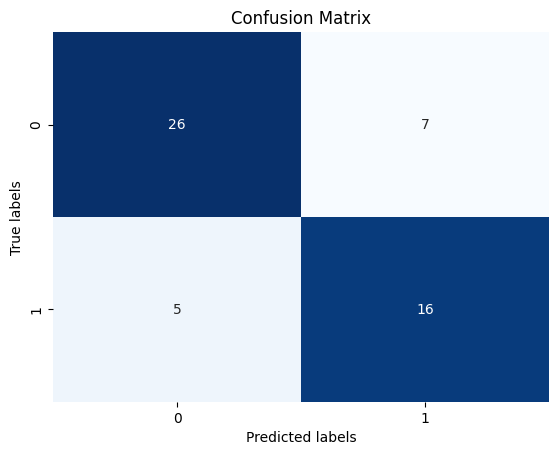

              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81        33
         1.0       0.70      0.76      0.73        21

    accuracy                           0.78        54
   macro avg       0.77      0.77      0.77        54
weighted avg       0.78      0.78      0.78        54



In [35]:
# adaboost
adb_model = AdaBoostClassifier(n_estimators=100,random_state=42)
adb_model.fit(X_train, y_train)
y_predadb = adb_model.predict(X_test)

plot_confusion_matrix(y_test , y_predadb)
print(classification_report(y_test, y_predadb))

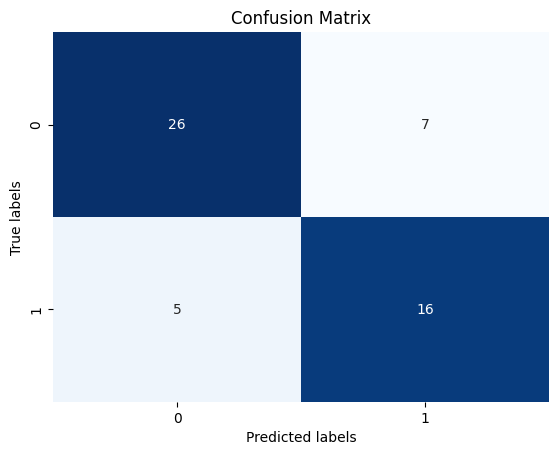

              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81        33
         1.0       0.70      0.76      0.73        21

    accuracy                           0.78        54
   macro avg       0.77      0.77      0.77        54
weighted avg       0.78      0.78      0.78        54



In [36]:
# decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_preddt = adb_model.predict(X_test)

plot_confusion_matrix(y_test , y_preddt)
print(classification_report(y_test, y_preddt))

In [47]:
# Linear Regression
data = patient_data

df = pd.DataFrame(data)

# Define features (X) and target (y)
features = ['Age', 'Sex', 'BP', 'Cholesterol', 'FBS over 120', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
X = df[features]
y = df['Heart Disease']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

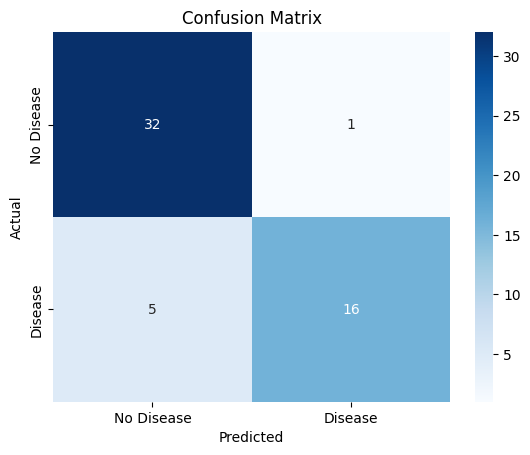

              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81        33
         1.0       0.70      0.76      0.73        21

    accuracy                           0.78        54
   macro avg       0.77      0.77      0.77        54
weighted avg       0.78      0.78      0.78        54



In [51]:
y_pred_continuous = model.predict(X_test)
y_pred_binary = (y_pred_continuous >= 0.5).astype(int)
# Evaluate the model
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_preddt))